<a href="https://colab.research.google.com/github/supercode01/AUTOMATED-ESSAY-SCORING_codealpha/blob/main/codealphatask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadtalha766","key":"c065a5bd39567e433acaf5ddcd827199"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# (Optional but recommended) Google Drive mount (taake data safe rahe)
from google.colab import drive
drive.mount('/content/drive')   # authorize karo
!mkdir -p /content/drive/MyDrive/asap_data

Mounted at /content/drive


In [5]:
!kaggle datasets files -d lburleigh/asap-2-0


name                              size  creationDate                
---------------------------  ---------  --------------------------  
ASAP2_train_sourcetexts.csv  208746469  2025-01-30 17:43:27.082000  


In [6]:
!kaggle datasets download -d lburleigh/asap-2-0 -f "ASAP2_train_sourcetexts.csv" -p /content/asap_data


Dataset URL: https://www.kaggle.com/datasets/lburleigh/asap-2-0
License(s): Attribution 4.0 International (CC BY 4.0)
 63% 126M/199M [00:00<00:00, 1.31GB/s]
100% 199M/199M [00:00<00:00, 915MB/s] 


In [7]:
import pandas as pd
df = pd.read_csv('/content/asap_data/ASAP2_train_sourcetexts.csv')
df.head()


,essay_id,score,full_text,assignment,prompt_name,economically_disadvantaged,student_disability_status,ell_status,race_ethnicity,gender,source_text_1,source_text_2,source_text_3,source_text_4
0,AAAVUP14319000159574,4,The author suggests that studying Venus is wor...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,Black/African American,F,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
1,AAAVUP14319000159542,2,NASA is fighting to be alble to to go to Venus...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Not economically disadvantaged,Not identified as having disability,No,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
2,AAAVUP14319000159461,3,"""The Evening Star"", is one of the brightest po...","In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,White,M,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
3,AAAVUP14319000159420,2,The author supports this idea because from rea...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
4,AAAVUP14319000159419,2,How the author supports this idea is that he s...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Not identified as having disability,Yes,Hispanic/Latino,M,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24728 entries, 0 to 24727
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   essay_id                    24728 non-null  object
 1   score                       24728 non-null  int64 
 2   full_text                   24728 non-null  object
 3   assignment                  24728 non-null  object
 4   prompt_name                 24728 non-null  object
 5   economically_disadvantaged  20723 non-null  object
 6   student_disability_status   20723 non-null  object
 7   ell_status                  24286 non-null  object
 8   race_ethnicity              24724 non-null  object
 9   gender                      24728 non-null  object
 10  source_text_1               24728 non-null  object
 11  source_text_2               4005 non-null   object
 12  source_text_3               4005 non-null   object
 13  source_text_4               1959 non-null   ob

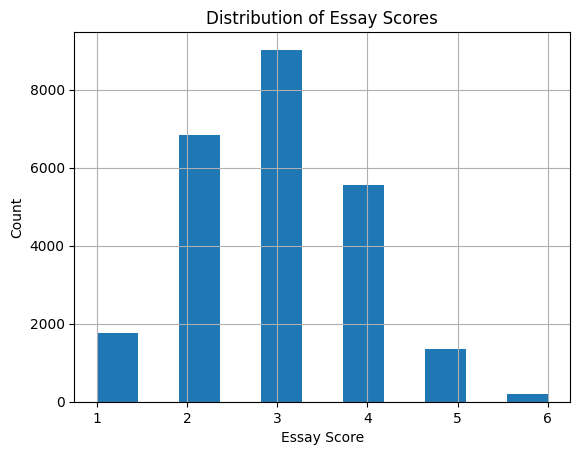

In [9]:
import matplotlib.pyplot as plt

df['score'].hist(bins=11)
plt.xlabel("Essay Score")
plt.ylabel("Count")
plt.title("Distribution of Essay Scores")
plt.show()

<Axes: >

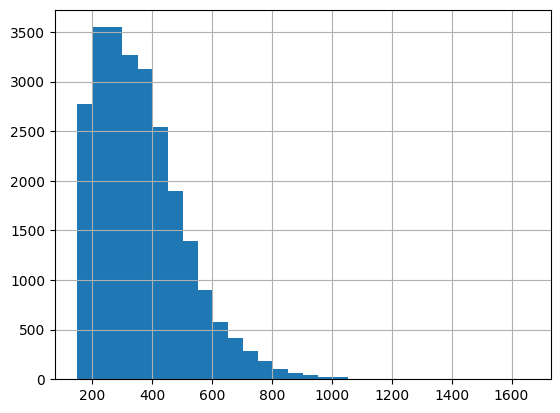

In [10]:
df['essay_length'] = df['full_text'].apply(lambda x: len(str(x).split()))
df['essay_length'].hist(bins=30)

<Axes: xlabel='essay_length', ylabel='score'>

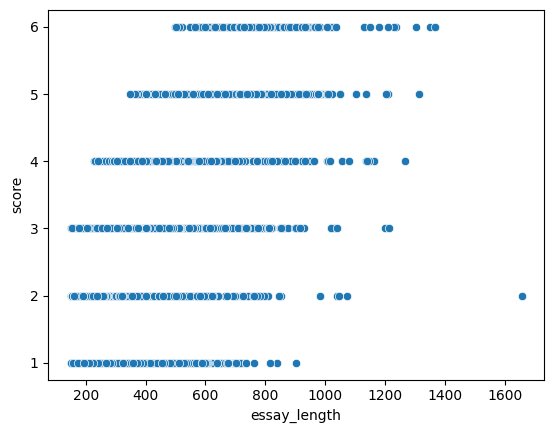

In [11]:
import seaborn as sns

sns.scatterplot(x="essay_length", y="score", data=df)


In [12]:
df.isnull().sum()


,0
essay_id,0
score,0
full_text,0
assignment,0
prompt_name,0
economically_disadvantaged,4005
student_disability_status,4005
ell_status,442
race_ethnicity,4
gender,0


In [13]:
df['ell_status'] = df['ell_status'].fillna("Unknown")
df['race_ethnicity'] = df['race_ethnicity'].fillna("Unknown")

df['economically_disadvantaged'] = df['economically_disadvantaged'].fillna("Unknown")
df['student_disability_status'] = df['student_disability_status'].fillna("Unknown")



In [14]:
df.isnull().sum()

,0
essay_id,0
score,0
full_text,0
assignment,0
prompt_name,0
economically_disadvantaged,0
student_disability_status,0
ell_status,0
race_ethnicity,0
gender,0


In [15]:
df = df.drop(columns=["source_text_2", "source_text_3", "source_text_4"])


In [16]:
df.isnull().sum()

,0
essay_id,0
score,0
full_text,0
assignment,0
prompt_name,0
economically_disadvantaged,0
student_disability_status,0
ell_status,0
race_ethnicity,0
gender,0


In [17]:
!apt-get install -y -qq default-jre    # language_tool ko Java chahiye (optional)
!pip install -q sentence-transformers pyspellchecker textstat xgboost tqdm
# (language-tool-python slow ho sakta hai; agar chaho usay add karenge)


Selecting previously unselected package default-jre-headless.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../0-default-jre-headless_2%3a1.11-72build2_amd64.deb ...
Unpacking default-jre-headless (2:1.11-72build2) ...
Selecting previously unselected package libxtst6:amd64.
Preparing to unpack .../1-libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package openjdk-11-jre:amd64.
Preparing to unpack .../2-openjdk-11-jre_11.0.28+6-1ubuntu1~22.04.1_amd64.deb ...
Unpacking openjdk-11-jre:amd64 (11.0.28+6-1ubuntu1~22.04.1) ...
Selecting previously unselected package default-jre.
Preparing to unpack .../3-default-jre_2%3a1.11-72build2_amd64.deb ...
Unpacking default-jre (2:1.11-72build2) ...
Selecting previously unselected package fonts-dejavu-core.
Preparing to unpack .../4-fonts-dejavu-core_2.37-2build1_all.deb ...
Unpacking fonts-dejavu-core (2.37-2build1) ...
Selecting pre

In [18]:
import numpy as np, pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from spellchecker import SpellChecker
import textstat
from collections import Counter
from scipy.sparse import csr_matrix, hstack
from tqdm import tqdm
tqdm.pandas()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [19]:
# Quick text cleaning & token helpers
import re
def clean_text(t):
    if not isinstance(t, str): return ""
    t = t.replace("\n", " ").strip()
    t = re.sub(r"\s+", " ", t)
    return t

def tokenize_words(text):
    tokens = [w for w in nltk.word_tokenize(text) if w.isalpha()]
    return tokens


In [20]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
# assume df already loaded and cleaned, and has columns: 'full_text', 'source_text_1', 'essay_length', 'score'
df['full_text_clean'] = df['full_text'].astype(str).progress_apply(clean_text)
df['source_text_1_clean'] = df['source_text_1'].astype(str).progress_apply(clean_text)

# 1) Relevance using TF-IDF cosine (fast)
tf_vect = TfidfVectorizer(ngram_range=(1,2), max_features=20000, stop_words='english')
# fit on both essays + sources to share vocab
tf_vect.fit(pd.concat([df['full_text_clean'], df['source_text_1_clean']]).unique())
essay_tfidf = tf_vect.transform(df['full_text_clean'])
source_tfidf = tf_vect.transform(df['source_text_1_clean'])
df['relevance_tfidf_cosine'] = cosine_similarity(essay_tfidf, source_tfidf).diagonal()

# 2) Grammar & Spelling (pyspellchecker + textstat)
spell = SpellChecker()
def spell_readability_features(text):
    tokens = [w.lower() for w in tokenize_words(text)]
    total = len(tokens)
    miss = len(spell.unknown(tokens))
    miss_ratio = miss / total if total>0 else 0.0
    # readability (may be NaN for very short text)
    try:
        flesch = textstat.flesch_reading_ease(text)
        fk = textstat.flesch_kincaid_grade(text)
    except:
        flesch, fk = 0.0, 0.0
    return miss, miss_ratio, flesch, fk

spell_feats = df['full_text_clean'].progress_apply(spell_readability_features)
df[['misspell_count','misspell_ratio','flesch_reading_ease','fk_grade']] = pd.DataFrame(spell_feats.tolist(), index=df.index)

# 3) Coherence & Structure (fast proxies)
def structure_features(text):
    sents = nltk.sent_tokenize(text)
    sent_count = len(sents)
    words_per_sent = [len(tokenize_words(s)) for s in sents] if sent_count>0 else [0]
    avg_sent_len = np.mean(words_per_sent) if sent_count>0 else 0.0
    sent_std = np.std(words_per_sent) if sent_count>0 else 0.0
    paras = [p for p in text.split('\n\n') if p.strip()]
    para_count = len(paras) if len(paras)>0 else 1
    return sent_count, avg_sent_len, sent_std, para_count

struct_feats = df['full_text_clean'].progress_apply(structure_features)
df[['sent_count','avg_sent_len','sent_len_std','para_count']] = pd.DataFrame(struct_feats.tolist(), index=df.index)

# 4) Vocabulary richness
def vocab_features(text):
    tokens = [w.lower() for w in tokenize_words(text)]
    total = len(tokens)
    unique = len(set(tokens))
    ttr = unique / total if total>0 else 0.0
    freqs = Counter(tokens)
    hapax = sum(1 for w,c in freqs.items() if c==1) / total if total>0 else 0.0
    avg_word_len = np.mean([len(w) for w in tokens]) if total>0 else 0.0
    return unique, ttr, hapax, avg_word_len

vocab_feats = df['full_text_clean'].progress_apply(vocab_features)
df[['unique_words','ttr','hapax_ratio','avg_word_len']] = pd.DataFrame(vocab_feats.tolist(), index=df.index)

# Quick look
display(df[['relevance_tfidf_cosine','misspell_count','misspell_ratio','flesch_reading_ease','sent_count','avg_sent_len','ttr']].head())


100%|██████████| 24728/24728 [00:48<00:00, 514.64it/s]


,relevance_tfidf_cosine,misspell_count,misspell_ratio,flesch_reading_ease,sent_count,avg_sent_len,ttr
0,0.446493,9,0.023256,49.408355,17,22.764706,0.516796
1,0.179660,11,0.057292,75.664821,10,19.200000,0.588542
2,0.528815,11,0.029730,69.497985,31,11.935484,0.502703
3,0.349155,5,0.023474,57.312097,10,21.300000,0.525822
4,0.306830,27,0.126168,49.006667,7,30.571429,0.593458


In [22]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack

num_cols = ['relevance_tfidf_cosine','misspell_count','misspell_ratio',
            'flesch_reading_ease','fk_grade','sent_count','avg_sent_len',
            'sent_len_std','para_count','unique_words','ttr',
            'hapax_ratio','avg_word_len','essay_length']

num_df = df[num_cols].fillna(0)
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_df)

# convert to sparse and hstack with essay_tfidf
num_sparse = csr_matrix(num_scaled)
X_full = hstack([essay_tfidf, num_sparse])
y = df['score'].values

print("X shape:", X_full.shape, "| y shape:", y.shape)


X shape: (24728, 20014) | y shape: (24728,)


In [23]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import os

# Auto GPU detect (Colab GPU on ho to True)
USE_GPU = os.path.exists('/usr/bin/nvidia-smi')
tree_method = 'gpu_hist' if USE_GPU else 'hist'
predictor = 'gpu_predictor' if USE_GPU else 'auto'

def clamp_and_round(pred, lo, hi):
    p = np.clip(pred, lo, hi)
    return np.rint(p).astype(int)

def qwk(y_true, y_pred, lo, hi):
    return cohen_kappa_score(y_true, clamp_and_round(y_pred, lo, hi), weights='quadratic')

def rmse_fn(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5  # no 'squared' arg


In [24]:
# Preconditions: X_full, y already ready from your earlier steps
n_samples = min(5000, X_full.shape[0])
rng = np.random.RandomState(42)
idx = rng.choice(X_full.shape[0], size=n_samples, replace=False)

X_small = X_full[idx]
y_small = y[idx]

kf = KFold(n_splits=3, shuffle=True, random_state=42)
rmse_list, qwk_list = [], []
lo, hi = y.min(), y.max()

for fold, (tr, va) in enumerate(kf.split(X_small), 1):
    X_tr, X_val = X_small[tr], X_small[va]
    y_tr, y_val = y_small[tr], y_small[va]

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=120,         # fast
        learning_rate=0.08,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        tree_method=tree_method,
        predictor=predictor,
        random_state=42,
        n_jobs=-1,
        eval_metric='rmse'        # so XGB tracks RMSE internally
    )

    model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)

    preds = model.predict(X_val)
    rmse = rmse_fn(y_val, preds)
    kappa = qwk(y_val, preds, lo, hi)

    rmse_list.append(rmse)
    qwk_list.append(kappa)
    print(f"[FAST] Fold {fold}: RMSE={rmse:.3f}, QWK={kappa:.3f}")

print("\n[FAST] Average RMSE:", np.mean(rmse_list))
print("[FAST] Average QWK:", np.mean(qwk_list))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [16:22:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:729: Use

[FAST] Fold 1: RMSE=0.623, QWK=0.751


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [16:22:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:22:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[FAST] Fold 2: RMSE=0.619, QWK=0.741
[FAST] Fold 3: RMSE=0.631, QWK=0.722

[FAST] Average RMSE: 0.624542567413453
[FAST] Average QWK: 0.737902796796765


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [16:22:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [25]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, cohen_kappa_score
import numpy as np

# Clamp predictions between min/max and round to nearest int
def clamp_and_round(pred, lo, hi):
    p = np.clip(pred, lo, hi)
    return np.rint(p).astype(int)

# Quadratic Weighted Kappa
def qwk(y_true, y_pred, lo, hi):
    return cohen_kappa_score(y_true, clamp_and_round(y_pred, lo, hi), weights='quadratic')

# --- Full dataset run ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_list, qwk_list = [], []

lo, hi = y.min(), y.max()  # score range

for fold, (train_idx, val_idx) in enumerate(kf.split(X_full)):
    print(f"\n[GPU] Fold {fold+1} training...")

    X_tr, X_val = X_full[train_idx], X_full[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,        # zyada trees better accuracy
        learning_rate=0.05,      # slow/steady learning
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        tree_method="hist",      # instead of gpu_hist
        device="cuda"            # proper GPU usage
    )

    model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)

    preds = model.predict(X_val)

    # ✅ Manual RMSE calculation (no version issue)
    mse = mean_squared_error(y_val, preds)
    rmse = np.sqrt(mse)

    kappa = qwk(y_val, preds, lo, hi)

    rmse_list.append(rmse)
    qwk_list.append(kappa)

    print(f"[GPU] Fold {fold+1}: RMSE={rmse:.3f}, QWK={kappa:.3f}")

print("\n===== FINAL RESULTS (Full Run) =====")
print("Average RMSE:", np.mean(rmse_list))
print("Average QWK:", np.mean(qwk_list))



[GPU] Fold 1 training...
[GPU] Fold 1: RMSE=0.591, QWK=0.764

[GPU] Fold 2 training...
[GPU] Fold 2: RMSE=0.599, QWK=0.771

[GPU] Fold 3 training...
[GPU] Fold 3: RMSE=0.572, QWK=0.785

[GPU] Fold 4 training...
[GPU] Fold 4: RMSE=0.586, QWK=0.764

[GPU] Fold 5 training...
[GPU] Fold 5: RMSE=0.592, QWK=0.764

===== FINAL RESULTS (Full Run) =====
Average RMSE: 0.587878948367035
Average QWK: 0.7695700022795775


In [26]:
#Save trained model
model.save_model("xgb_model.json")   # XGBoost ka native format


In [27]:
# Sample test from validation data
sample_idx = 31   # enter any row index
X_sample = X_full[sample_idx:sample_idx+1]
y_true = y[sample_idx]

y_pred = model.predict(X_sample)[0]          # model prediction
y_pred_rounded = np.rint(np.clip(y_pred, y.min(), y.max())).astype(int)

print("Actual Score:", y_true)
print("Predicted Score (raw):", y_pred)
print("Predicted Score (rounded):", y_pred_rounded)


Actual Score: 3
Predicted Score (raw): 2.6206105
Predicted Score (rounded): 3


In [29]:
#  Sample test from validation data
sample_idx = 10200   # enter any row index
X_sample = X_full[sample_idx:sample_idx+1]
y_true = y[sample_idx]

y_pred = model.predict(X_sample)[0]          # model prediction
y_pred_rounded = np.rint(np.clip(y_pred, y.min(), y.max())).astype(int)

print("Actual Score:", y_true)
print("Predicted Score (raw):", y_pred)
print("Predicted Score (rounded):", y_pred_rounded)


Actual Score: 4
Predicted Score (raw): 3.366335
Predicted Score (rounded): 3


In [30]:
#  Sample test from validation data
sample_idx = 2100   # enter any row index
X_sample = X_full[sample_idx:sample_idx+1]
y_true = y[sample_idx]

y_pred = model.predict(X_sample)[0]          # model prediction
y_pred_rounded = np.rint(np.clip(y_pred, y.min(), y.max())).astype(int)

print("Actual Score:", y_true)
print("Predicted Score (raw):", y_pred)
print("Predicted Score (rounded):", y_pred_rounded)

Actual Score: 3
Predicted Score (raw): 3.3672462
Predicted Score (rounded): 3


In [31]:
#  Sample test from validation data
sample_idx = 22222   # enter any row index
X_sample = X_full[sample_idx:sample_idx+1]
y_true = y[sample_idx]

y_pred = model.predict(X_sample)[0]          # model prediction
y_pred_rounded = np.rint(np.clip(y_pred, y.min(), y.max())).astype(int)

print("Actual Score:", y_true)
print("Predicted Score (raw):", y_pred)
print("Predicted Score (rounded):", y_pred_rounded)

Actual Score: 2
Predicted Score (raw): 2.472454
Predicted Score (rounded): 2
